# Fibbonacci Sequence

Fibbonacci Sequence:
$$
    0, 1, 1, 2, 3, 5, 8, 13, ...
$$

## Binet's Formula

We'll try evaluating elements of Fibbonacci seuqence using Binet's Formula. Using SymPy for math.

In [9]:
import sympy as sp
from sympy.core.power import Pow

In [45]:
Phi = sp.symbols('Phi') # Golden ratio
n = sp.symbols('n')

In [46]:
# Binet's formula for calculating n'th fibonnacci symbol
binet = (Phi**n - ((-1)**n)/(Phi**n)) / Pow(sp.Integer(5), sp.Float(0.5))

In [47]:
binet

-0.447213595499958*(-1)**n*Phi**(-n) + 0.447213595499958*Phi**n

In [51]:
Phi_val = (sp.Integer(1) + Pow(sp.Integer(5), sp.Float(0.5))) / sp.Integer(2)

In [52]:
Phi_val

1.61803398874989

In [58]:
def evaluate_binet(n):
    return binet.evalf(subs={'Phi': Phi_val, 'n':n})

In [63]:
# First 10 Fibbonacci numbers (starting from 0)
for i in range(10):
    print(i, int(evaluate_binet(i)))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


In [64]:
# Looking at negative numbers as well
for i in range(-5, 5):
    print(i, int(evaluate_binet(i)))

-5 5
-4 -3
-3 2
-2 -1
-1 1
0 0
1 1
2 1
3 2
4 3


How about complex results for real values?

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
interval = np.linspace(0, 5, 200)

In [101]:
fibonnaccis = []
for i in interval:
    fibonnaccis.append(evaluate_binet(i).as_real_imag())
fibonnaccis = np.array(fibonnaccis)

In [110]:
fibonnaccis_int = []
for i in range(0, 6):
    fibonnaccis_int.append(evaluate_binet(i).as_real_imag())
fibonnaccis_int = np.array(fibonnaccis_int)

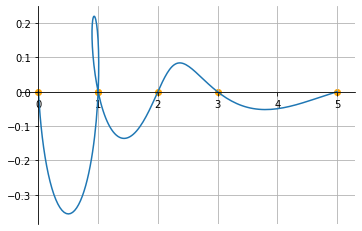

In [112]:
fig, ax = plt.subplots()

ax.plot(fibonnaccis[:, 0], fibonnaccis[:, 1])
ax.scatter(fibonnaccis_int[:, 0], fibonnaccis_int[:, 1], color='orange')

#ax.set_aspect('equal')
ax.grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

And including negative numbers. We get a spiral as negative-index Fibonacci numbers jump between positive and negative

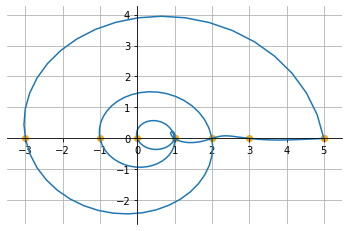

In [114]:
interval = np.linspace(-5, 5, 200)
fibonnaccis = []
for i in interval:
    fibonnaccis.append(evaluate_binet(i).as_real_imag())
fibonnaccis = np.array(fibonnaccis)

fibonnaccis_int = []
for i in range(-5, 6):
    fibonnaccis_int.append(evaluate_binet(i).as_real_imag())
fibonnaccis_int = np.array(fibonnaccis_int)

fig, ax = plt.subplots()

ax.plot(fibonnaccis[:, 0], fibonnaccis[:, 1])
ax.scatter(fibonnaccis_int[:, 0], fibonnaccis_int[:, 1], color='orange')

#ax.set_aspect('equal')
ax.grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

Let's plot in 3d. Complex results - 2 dimensions plus an axis for the indexes. Perhaps that would shine light on why we get spiral face on in negative values and then side view of a spiral in positive values.

In [135]:
from mpl_toolkits.mplot3d import Axes3D

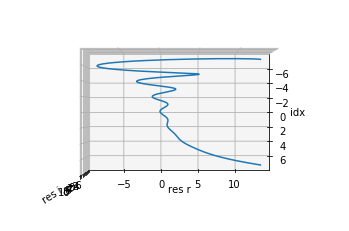

In [157]:
interval = np.linspace(-7, 7, 300)
fibonnaccis = []
for i in interval:
    fibonnaccis.append(evaluate_binet(i).as_real_imag())
fibonnaccis = np.array(fibonnaccis)

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(interval, fibonnaccis[:, 0], fibonnaccis[:, 1])
ax.set_xlabel('idx')
ax.set_ylabel('res r')
ax.set_zlabel('res i')

# rotate the axes and update
v_angle = 90
h_angle = 0
ax.view_init(v_angle, h_angle)
plt.show()

### Exercises

http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/fibFormula.html

In [129]:
# 1.2.2 1 F(100) = 354224848179261915075
estimate = int(binet.evalf(n=20, subs={'Phi':Phi_val, n:100}))
print(estimate, estimate-354224848179261915075)
# Error can be explained by the roundings of the phi value and sqrt of 5 in formula ._.

354224848179263095119 1180044


In [130]:
# 1.2.2 3 # digits F(100)
len(str(estimate))

21

In [133]:
# 1.2.2 3 Lucas numbers (just add the phi^n and -phi(^n()) directly)
lucases = Phi**n + ((-1)**n)/(Phi**n)

In [134]:
for i in range(10):
    print(i, lucases.evalf(subs={'Phi': Phi_val, 'n':i}))
# Lucas numbers are similar to Fibbonacci but start at 2, 1?

0 2.00000000000000
1 1.00000000000000
2 3.00000000000000
3 4.00000000000000
4 7.00000000000000
5 11.0000000000000
6 18.0000000000000
7 29.0000000000000
8 47.0000000000000
9 76.0000000000000
